# Calibration of a diffraction setup using `Jupyter` notebooks

This notebook presents a very simple GUI for doing the calibration of diffraction setup within the `Jupyter` lab or notebook environment with `Matplotlib` and `Ipywidgets`. 
It has been tested with `widget` and the `notebook` (aka `nbagg`) integration of matplotlib.

Despite this is in the `cookbook` section, this **tutorial** requires advanced Python programming knowledge and some good understanding of `PyFAI`. 

The basic idea is to port directly the `pyFAI-calib` interface which was done with matplotlib into the Jupyter notebook. 

The PeakPicker widget has been refactored and the Calibration tool adapted for the notebook usage.

In this example those versions of software were used:

* jupyterlab: 3.2.8

* notebook: 6.1.6

* matplotlib: 3.5.1

* ipympl: 0.8.6

* ipywidgets: 7.6.5

Most credits go *Philipp Hans* for the adaptation of the origin PeakPicker class to Jupyter.

In [1]:
%matplotlib nbagg 
# %matplotlib widget

import pyFAI
import pyFAI.test.utilstest
import fabio
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
from pyFAI.gui.jupyter.calib import Calibration

print(f"PyFAI version {pyFAI.version}")

PyFAI version 0.21.0-dev3


In [2]:
# Some parameters like the wavelength, the calibrant and the diffraction image:
wavelength = 1e-10
pilatus = pyFAI.detector_factory("Pilatus1M")
AgBh = pyFAI.calibrant.CALIBRANT_FACTORY("AgBh")
AgBh.wavelength = wavelength

#load some test data (requires an internet connection)
img = fabio.open(pyFAI.test.utilstest.UtilsTest.getimage("Pilatus1M.edf")).data

<IPython.core.display.Javascript object>


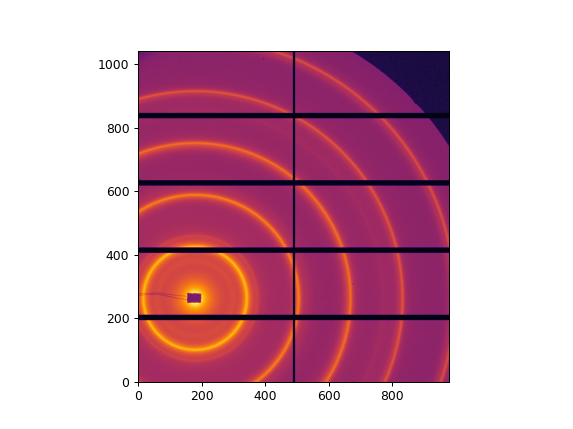

In [3]:
# Simply display the scattering image:
_ = jupyter.display(img)

In [4]:
calib = Calibration(img, calibrant=AgBh, wavelength=wavelength, detector=pilatus)
# This displays the calibration widget: 

# 1. Set the ring number (0-based value), below the plot 
# 2. Pick the ring by right-clicking with the mouse on the image.
# 3. Restart at 1. for at least a second ring
# 4. Click refine to launch the calibration.

Before refinement, the geometry is:
Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.000000e-01m	PONI= 0.000000e+00, 0.000000e+00m	rot1=0.000000  rot2= 0.000000  rot3= 0.000000 rad
DirectBeamDist= 100.000mm	Center: x=0.000, y=0.000 pix	Tilt=0.000 deg  tiltPlanRotation= 0.000 deg
Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.633043e+00m	PONI= 1.223095e-01, 2.628343e-02m	rot1=-0.002844  rot2= -0.047012  rot3= 0.000000 rad
DirectBeamDist= 1634.856mm	Center: x=179.817, y=264.421 pix	Tilt=2.698 deg  tiltPlanRotation= -86.540 deg
Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.632826e+00m	PONI= 1.222996e-01, 2.628170e-02m	rot1=-0.002852  rot2= -0.047013  rot3= 0.000000 rad
DirectBeamDist= 1634.639mm	Center: x=179.872, y=264.410 pix	Tilt=2.699 deg  tiltPlanRotation= -86.531 deg
Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 

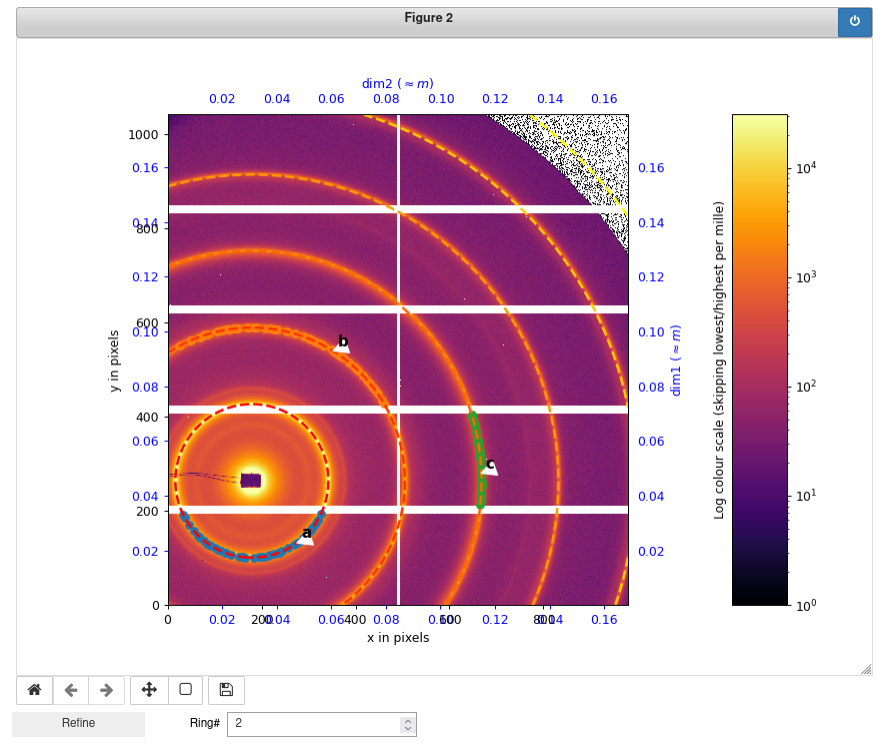

In [5]:
# Here is a screenshot of the previous widget, since it is not recoreded inside the notebook itself.
from IPython.display import Image
Image(filename='pyFAI-calib_notebook.png') 

In [5]:
# This is the calibrated geometry:
gr = calib.geoRef
print(gr)
print(f"Fixed parameters: {calib.fixed}")
print(f"Cost function: {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.632826e+00m	PONI= 1.222996e-01, 2.628170e-02m	rot1=-0.002852  rot2= -0.047013  rot3= 0.000000 rad
DirectBeamDist= 1634.639mm	Center: x=179.872, y=264.410 pix	Tilt=2.699 deg  tiltPlanRotation= -86.531 deg
Fixed parameters: ['wavelength', 'rot3']
Cost function: 1.532467318765197e-07


In [6]:
# Geometry refinement with some constrains: SAXS mode 
# Here we enforce all rotation to be null and fit again the model:

gr.rot1 = gr.rot2 = gr.rot3 = 0
gr.refine3(fix=["rot1", "rot2", "rot3", "wavelength"])
print(gr)
print(f"Cost function = {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.634831e+00m	PONI= 4.543425e-02, 3.093027e-02m	rot1=0.000000  rot2= 0.000000  rot3= 0.000000 rad
DirectBeamDist= 1634.831mm	Center: x=179.827, y=264.153 pix	Tilt=0.000 deg  tiltPlanRotation= 0.000 deg
Cost function = 1.5907780154943566e-07


In [7]:
gr.save("jupyter.poni")
gr.get_config()

OrderedDict([('poni_version', 2),
             ('detector', 'Pilatus1M'),
             ('detector_config', OrderedDict()),
             ('dist', 1.634831396919371),
             ('poni1', 0.04543425362516216),
             ('poni2', 0.030930268602695623),
             ('rot1', 0.0),
             ('rot2', 0.0),
             ('rot3', 0.0),
             ('wavelength', 1e-10)])

In [8]:
# Create a "normal" azimuthal integrator (without fitting capabilities from the geometry-refinement object)
ai = pyFAI.load(gr)
ai

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.634831e+00m	PONI= 4.543425e-02, 3.093027e-02m	rot1=0.000000  rot2= 0.000000  rot3= 0.000000 rad
DirectBeamDist= 1634.831mm	Center: x=179.827, y=264.153 pix	Tilt=0.000 deg  tiltPlanRotation= 0.000 deg

<IPython.core.display.Javascript object>


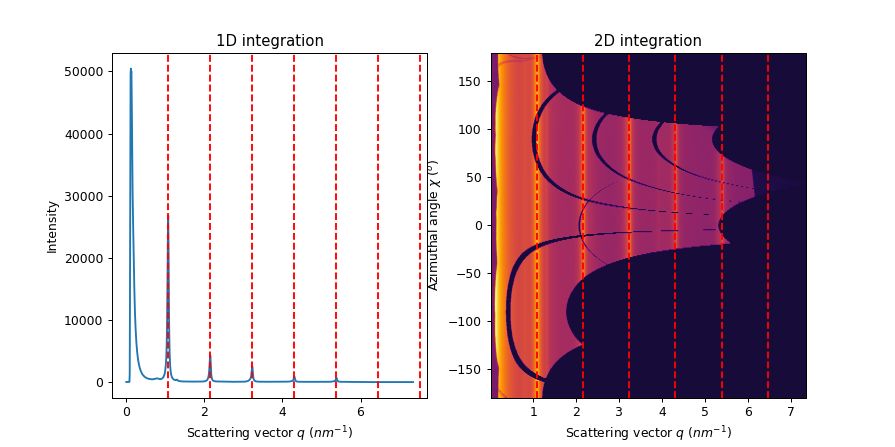

In [9]:
# Display the integrated data to validate the calibration.
fig, ax = subplots(1, 2, figsize=(10, 5))
jupyter.plot1d(ai.integrate1d(img, 1000),  calibrant=AgBh, ax=ax[0])
jupyter.plot2d(ai.integrate2d(img, 1000),  calibrant=AgBh, ax=ax[1])
_ = ax[1].set_title("2D integration")

## Conclusion

This short notebook shows how to interact with a calibration image to pick some control-point from the Debye-Scherrer ring and to perform the calibration of the experimental setup.